In [8]:
import numpy as np
def f(x,t):
    res =  np.sin(x)*(np.cos(t)-np.sin(t))      #задаем функцию правой части
    return res
def Ttoch(t,x):
    res =  np.sin(x)*np.cos(t)     #задаем точное решение
    return res

Nt =  100                     #задать кол-во узлов по t. Это кол-во отрезков (тк плюс еще нулевой узел будет!)
Nx =  100                          #задать кол-во узлов по x
t = np.linspace(0, 10, Nt+1)
x = np.linspace(0, 10, Nx+1)
k = np.zeros((Nt+1,Nx+1))       
Lx = x[Nx]-x[0]
Lt = t[Nt]-t[0]
def Txo(t):              #функция при х=х[0]
    return (Ttoch(t,0))            
def TNx(t):              #функция при х=[x]
    return (Ttoch(t,1))
def T0(x):               #функция при t=t0 
    return (Ttoch(0,x))
T = np.zeros((Nt+1, Nx+1))
ht = Lx/Nx
hx = Lt/Nt

In [9]:
#сама прогонка

for i in range(Nx):              
    T[0,i]=T0(x[i])
for n in range(Nt):              #фиксируем время
    T[n+1,0]=Txo(t[n+1])
    T[n+1,Nx]=TNx(t[n+1])
    for i in range(Nx+1):                    
        k[n+1,i]= 1
    ai= np.zeros(Nx-1)
    bi= np.zeros(Nx-1)    
    Ai = np.zeros(Nx-1)            #вычисление Ai Bi Ci Di
    Bi = np.zeros(Nx-1)
    Ci = np.zeros(Nx-1)
    Di = np.zeros(Nx-1)
    for j in range(Nx-1): 
        i=j+1
        Ai[j]= -(k[n+1,i]+k[n+1,i-1])/(2*hx**2)
        Bi[j]= (2*k[n+1,i]+k[n+1,i+1]+k[n+1,i-1])/(2*hx**2)+1/ht
        Ci[j]= -(k[n+1,i]+k[n+1,i+1])/(2*hx**2)
        Di[j]= f(x[i],t[n+1])+T[n,i]/ht
        #Ai[j]= -1/hx**2
        #Bi[j]= 2/hx**2+1/ht
        #Ci[j]= -1/hx**2
        #Di[j]= f(x[i],t[n+1])+T[n,i]/ht
    ai[0]= -Ci[0]/Bi[0]                     #вычисляем альфа и бетта - первые отдельно, и потом до Nx-1
    bi[0]= (Di[0]-Ai[0]*Txo(t[n+1]))/Bi[0]
    for j in range(Nx-2): 
        i=j+1
        ai[i]= -Ci[i]/(Ai[i]*ai[i-1]+Bi[i])
        bi[i]= (Di[i]-Ai[i]*bi[i-1])/(Ai[i]*ai[i-1]+Bi[i])

    for j in range(Nx-1):                   #обратной прогонкой находим Т = n+1ю строчку в матрице значений 
        i=Nx-1-j
        T[n+1,i]=ai[i-1]*T[n+1,i+1]+bi[i-1]
#print('альфа:',ai,'\n','бетта:',bi)
#print('\n',T)

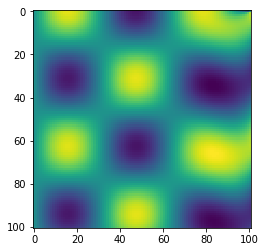

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(T)

In [11]:
import plotly.graph_objs as go
def Graph(TempTable):
    fig = go.Figure(data=[go.Surface(z=TempTable,colorscale="hot")])
    fig.update_layout(autosize=False,scene = dict(xaxis_title='x',yaxis_title='t',zaxis_title='T'),margin=dict(r=2, b=1, l=1, t=1),showlegend=False)
    fig.show()
Graph(T)

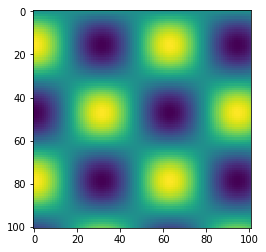

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
H=[[Ttoch(t[n],x[i]) for n in range(Nt+1)]for i in range(Nx+1) ]
plt.imshow(H)

In [16]:
import plotly.graph_objs as go
def Graph(TempTable):
    fig = go.Figure(data=[go.Surface(z=TempTable,colorscale="hot")])
    fig.update_layout(autosize=False,scene = dict(xaxis_title='x',yaxis_title='t',zaxis_title='T'),margin=dict(r=2, b=1, l=1, t=1),showlegend=False)
    fig.show()
Graph(H)

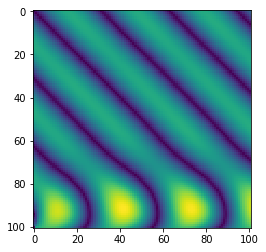

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
E=[[abs(H[n][i]-T[n,i]) for n in range(Nt+1)]for i in range(Nx+1) ]
plt.imshow(E)

In [17]:
import plotly.graph_objs as go
def Graph(TempTable):
    fig = go.Figure(data=[go.Surface(z=TempTable,colorscale="hot")])
    fig.update_layout(autosize=False,scene = dict(xaxis_title='x',yaxis_title='t',zaxis_title='T'),margin=dict(r=2, b=1, l=1, t=1),showlegend=False)
    fig.show()
Graph(E)